In [45]:
import pandas as pd
import main
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.cm as cm
import numpy as np
from conversion import points_to_smooth_lines



In [2]:
df = pd.read_csv('/Users/willponczak/Desktop/QC2025/data/grouped-months/all_months_1day.csv', sep=',')

In [3]:
#################
# Before Algorithm
#################

In [4]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})

# # Get unique ships and assign colors
# unique_ships = df['shipid'].unique()
# colors = cm.hsv(np.linspace(0, 1, len(unique_ships)))

# # Plot each ship with a different color
# for i, ship_id in enumerate(unique_ships):
#     ship_data = df[df['shipid'] == ship_id]
#     ax.plot(ship_data['longitude'], ship_data['latitude'], color=colors[i])

# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.LAKES)
# ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.LAND)

# ax.set_xlim(-20, 30)
# ax.set_ylim(50, 80)

# fig.show()

In [5]:
df_one_shipid = df
df_one_shipid = df_one_shipid[(df_one_shipid['shipid'] == '146')]

In [6]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()})

# # Get unique ships and assign colors
# unique_ships = df_one_shipid['shipid'].unique()
# colors = cm.hsv(np.linspace(0, 1, len(unique_ships)))

# # Plot each ship with a different color
# #for i, ship_id in enumerate(unique_ships):
# ship_data = df_one_shipid[df_one_shipid['shipid'] == '146']
# ax.plot(ship_data['longitude'], ship_data['latitude'], color=colors[0])

# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.LAKES)
# ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.LAND)

# ax.set_xlim(-20, 30)
# ax.set_ylim(50, 80)

# fig.show()

In [7]:
##################
# After Algorithm
##################

In [8]:
df_after_alg = main.build_track_table(df)

Processing 2776664 records
Data sample after cleaning:
  Date range: 2019-01-31 00:00:00 to 2019-12-01 23:59:57
  Ship types: ['fishing vessels' 'passenger ships' 'general cargo ships'
 'other activities' 'ro-ro cargo ships' 'offshore supply ships'
 'crude oil tankers' 'bulk carriers' 'refrigerated cargo ships'
 'oil product tankers' 'other service offshore vessels' 'chemical tankers'
 'cruise ships' 'container ships' 'gas tankers']
  Unique ships: 6832
Creating segments for 6832 unique shipids
Created 6832 segments
Sample segment: fishing vessels|iceland|fs ice class 1c|< 1000 gt
Found 6832 segments across 12 time periods
Created 5296 tracks


In [9]:
df_after_alg.head()

,month,segment_id,track_id
0,2019-01,7541,track_001
1,2019-01,8353,track_002
2,2019-02,11382,track_002
3,2019-01,1642,track_003
4,2019-02,1511,track_003


In [10]:
result = pd.merge(df_after_alg, df, left_on='segment_id', right_on='shipid', how='inner')

In [11]:
result.head()

,month_x,segment_id,track_id,shipid,date_time_utc,flagname,iceclass,astd_cat,sizegroup_gt,fuelquality,...,blackwater,greywater,garbage,dist_nextpoint,sec_nextpoint,longitude,latitude,year,month_y,day
0,2019-01,7541,track_001,7541,2019-01-31 00:30:21,Bahamas,FS Ice Class 1B,Refrigerated cargo ships,1000 - 4999 GT,3,...,0.001174,0.008691,0.0,2234.9832,369,7.307430,63.767130,2019,1,31
1,2019-01,7541,track_001,7541,2019-01-31 03:46:38,Bahamas,FS Ice Class 1B,Refrigerated cargo ships,1000 - 4999 GT,3,...,0.001149,0.008503,0.0,2149.6070,361,6.456170,63.216120,2019,1,31
2,2019-01,7541,track_001,7541,2019-01-31 09:28:30,Bahamas,FS Ice Class 1B,Refrigerated cargo ships,1000 - 4999 GT,3,...,0.001178,0.008715,0.0,2458.9458,370,4.989175,62.243393,2019,1,31
3,2019-01,7541,track_001,7541,2019-01-31 01:26:10,Bahamas,FS Ice Class 1B,Refrigerated cargo ships,1000 - 4999 GT,3,...,0.001149,0.008503,0.0,2343.6943,361,7.067465,63.615368,2019,1,31
4,2019-01,7541,track_001,7541,2019-01-31 05:24:20,Bahamas,FS Ice Class 1B,Refrigerated cargo ships,1000 - 4999 GT,3,...,0.001178,0.008715,0.0,2332.2874,370,6.046176,62.953190,2019,1,31


In [12]:
df_one_track = result
df_one_track = df_one_track[(df_one_track['track_id'] == 'track_001')]

In [13]:
df_one_track.shape

(107, 32)

In [14]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# # Get unique tracks and assign colors
# unique_tracks = df_one_track['track_id'].unique()
# colors = cm.hsv(np.linspace(0, 1, len(unique_tracks)))

# # Plot each track with a different color
# #for i, track_id in enumerate(unique_tracks):
# track_data = df_one_track[df_one_track['track_id'] == 'track_001']
# ax.plot(track_data['longitude'], track_data['latitude'], color=colors[i])

# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.LAKES)
# ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.LAND)

# ax.set_xlim(-20, 30)
# ax.set_ylim(50, 80)

# fig.show()

In [15]:
# fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# # Get unique tracks and assign colors
# unique_tracks = df_one_track['track_id'].unique()
# colors = cm.hsv(np.linspace(0, 1, len(unique_tracks)))

# # Plot each track with a different color
# #for i, track_id in enumerate(unique_tracks):
# track_data = df_one_track[df_one_track['track_id'] == 'track_001']
# ax.plot(track_data['longitude'], track_data['latitude'], color=colors[0])

# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.LAKES)
# ax.add_feature(cfeature.OCEAN)
# ax.add_feature(cfeature.LAND)

# ax.set_xlim(-20, 30)
# ax.set_ylim(50, 80)

# fig.show()

In [16]:
df.columns

Index(['shipid', 'date_time_utc', 'flagname', 'iceclass', 'astd_cat',
       'sizegroup_gt', 'fuelquality', 'fuelcons', 'co', 'co2', 'so2', 'pm',
       'nox', 'n2o', 'nmvoc', 'ch4', 'blackcarbon', 'organiccarbon',
       'oilbilgewater', 'blackwater', 'greywater', 'garbage', 'dist_nextpoint',
       'sec_nextpoint', 'longitude', 'latitude', 'year', 'month', 'day'],
      dtype='object')

In [18]:
df.shipid.value_counts()

shipid
3000     3519
2731     2843
3362     2829
4037     2788
3520     2784
         ... 
5736        1
16522       1
3662        1
9294        1
9728        1
Name: count, Length: 6832, dtype: int64

In [25]:
df_s = df[df.shipid == 4589].dropna()

In [19]:
track_table = main.build_track_table(df)

Processing 2776664 records
Data sample after cleaning:
  Date range: 2019-01-31 00:00:00 to 2019-12-01 23:59:57
  Ship types: ['fishing vessels' 'passenger ships' 'general cargo ships'
 'other activities' 'ro-ro cargo ships' 'offshore supply ships'
 'crude oil tankers' 'bulk carriers' 'refrigerated cargo ships'
 'oil product tankers' 'other service offshore vessels' 'chemical tankers'
 'cruise ships' 'container ships' 'gas tankers']
  Unique ships: 6832
Creating segments for 6832 unique shipids
Created 6832 segments
Sample segment: fishing vessels|iceland|fs ice class 1c|< 1000 gt
Found 6832 segments across 12 time periods
Created 5296 tracks


In [20]:
track_table

,month,segment_id,track_id
0,2019-01,7541,track_001
1,2019-01,8353,track_002
2,2019-02,11382,track_002
3,2019-01,1642,track_003
4,2019-02,1511,track_003
...,...,...,...
6827,2019-12,1548,track_5292
6828,2019-12,1376,track_5293
6829,2019-12,3733,track_5294
6830,2019-12,2195,track_5295


In [26]:
df_big_with_tracks = df.merge(track_table, left_on='shipid', right_on='segment_id', how='left')


In [21]:
import cartopy

In [22]:
import matplotlib.pyplot as plt

In [23]:
import geopandas as gpd

In [27]:
gdf_s = gpd.GeoDataFrame(data=df_s, geometry=gpd.points_from_xy(x=df_s.longitude, y=df_s.latitude), crs=cartopy.crs.PlateCarree())

In [28]:
from shapely.geometry import LineString

gdf_s = gdf_s.sort_values(by=['shipid', 'date_time_utc'])


In [29]:

lines = (
    gdf_s.groupby('shipid')['geometry']
    .apply(lambda x: LineString(x.tolist()))
    .reset_index()
)


In [ ]:

# Convert to a GeoDataFrame
lines_gdf = gpd.GeoDataFrame(lines, geometry='geometry', crs=gdf_s.crs)


In [ ]:
lines_gdf

,shipid,geometry
0,4589,"LINESTRING (4.198 62.004, 4.231 62.021, 4.265 ..."


In [ ]:
df_s.longitude.min(), df_s.longitude.max()


(4.197778, 13.067311)

/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_47623/843529459.py:16: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


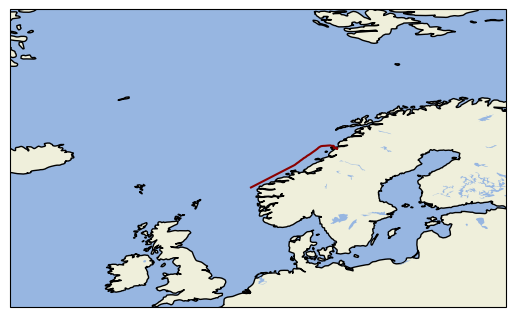

In [ ]:
# fig, ax = plt.subplots(1, 1, subplot_kw={'projection': cartopy.crs.PlateCarree()})

# # ax.plot(df_s['longitude'], df_s['latitude'])
# # gdf_s.plot(ax=ax)
# lines_gdf.plot(ax=ax, color='darkred')

# ax.add_feature(cartopy.feature.COASTLINE)
# ax.add_feature(cartopy.feature.LAKES)
# ax.add_feature(cartopy.feature.OCEAN)
# ax.add_feature(cartopy.feature.LAND)


# ax.set_xlim(-20, 30)
# ax.set_ylim(50, 80)

# fig.show()

In [ ]:
# # Sort to ensure LineStrings are in time order
# df_big_with_tracks = df_big_with_tracks.sort_values(by=['track_id', 'date_time_utc'])

# # Create LineStrings per track
# lines = (
#     df_big_with_tracks.groupby('track_id')
#     .apply(lambda x: LineString(zip(x['longitude'].values, x['latitude'].values)), include_groups=False)
#     .reset_index()
# )

# # Rename the geometry column
# lines.columns = ['track_id', 'geometry']

# # Convert to GeoDataFrame
# gdf_tracks = gpd.GeoDataFrame(lines, geometry='geometry')
# gdf_tracks.set_crs(epsg=4326, inplace=True)

# # Plot
# gdf_tracks.plot(figsize=(12, 8), linewidth=1, color='blue')
# plt.title("Ship Tracks")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.show()

In [ ]:
#################
# Before Algorithm
#################

In [30]:
df_after_alg[df_after_alg.track_id == 'track_002']

,month,segment_id,track_id
1,2019-01,8353,track_002
2,2019-02,11382,track_002


In [31]:
lookup_table = df_after_alg
df_jan = pd.read_csv('/Users/willponczak/Desktop/QC2025/data/astd/complete_data/2019/ASTD_area_level3_201901.csv', sep=';')
df_feb = pd.read_csv('/Users/willponczak/Desktop/QC2025/data/astd/complete_data/2019/ASTD_area_level3_201902.csv', sep=';')


/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_43979/686530408.py:2: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_jan = pd.read_csv('/Users/willponczak/Desktop/QC2025/data/astd/complete_data/2019/ASTD_area_level3_201901.csv', sep=';')
/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_43979/686530408.py:3: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_feb = pd.read_csv('/Users/willponczak/Desktop/QC2025/data/astd/complete_data/2019/ASTD_area_level3_201902.csv', sep=';')


In [32]:
lookup_table['track_id'].unique()

array(['track_001', 'track_002', 'track_003', ..., 'track_5294',
       'track_5295', 'track_5296'], dtype=object)

In [33]:
track_id = 'track_003'

In [34]:
segments_id = lookup_table.loc[lookup_table['track_id'] == track_id].set_index('month')

,shipid,date_time_utc,flagname,iceclass,astd_cat,sizegroup_gt,fuelquality,fuelcons,co,co2,...,blackcarbon,organiccarbon,oilbilgewater,blackwater,greywater,garbage,dist_nextpoint,sec_nextpoint,longitude,latitude
269635,1642,2019-01-22 21:21:29,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001534,0.000011,0.004864,...,2.762000e-07,9.328000e-07,3.600000e-09,0.000664,0.002183,0.0,134.337510,205,-23.917988,64.361190
269636,1642,2019-01-22 17:48:39,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001576,0.000012,0.004995,...,2.836000e-07,9.580000e-07,3.700000e-09,0.000684,0.002247,0.0,119.742546,211,-23.894562,64.268320
269637,1642,2019-01-22 10:05:20,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.002259,0.000017,0.007160,...,4.065000e-07,1.373200e-06,5.300000e-09,0.000966,0.003173,0.0,281.483280,298,-24.037764,64.355606
269638,1642,2019-01-22 09:45:49,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.000608,0.000004,0.001926,...,1.094000e-07,3.693000e-07,1.400000e-09,0.000259,0.000852,0.0,78.090096,80,-24.060272,64.354706
269639,1642,2019-01-22 18:40:50,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001059,0.000008,0.003356,...,1.906000e-07,6.437000e-07,2.500000e-09,0.000454,0.001491,0.0,126.745834,140,-23.929777,64.287030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17898826,1642,2019-01-21 05:02:29,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.006375,0.000047,0.020209,...,1.147600e-06,3.876200e-06,6.700000e-09,0.001231,0.004046,0.0,1447.355800,380,-24.095776,64.373350
17898827,1642,2019-01-21 19:11:08,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001215,0.000009,0.003852,...,2.187000e-07,7.388000e-07,2.800000e-09,0.000519,0.001704,0.0,156.388460,160,-23.867233,64.314980
17898828,1642,2019-01-21 16:35:38,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.002738,0.000020,0.008679,...,4.928000e-07,1.664700e-06,6.400000e-09,0.001167,0.003833,0.0,359.906520,360,-23.757530,64.335610
17898829,1642,2019-01-21 23:38:29,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001126,0.000008,0.003568,...,2.027000e-07,6.843000e-07,2.600000e-09,0.000483,0.001587,0.0,131.981930,149,-23.935781,64.329926


1642

In [ ]:
df.columns

Index(['shipid', 'date_time_utc', 'flagname', 'iceclass', 'astd_cat',
       'sizegroup_gt', 'fuelquality', 'fuelcons', 'co', 'co2', 'so2', 'pm',
       'nox', 'n2o', 'nmvoc', 'ch4', 'blackcarbon', 'organiccarbon',
       'oilbilgewater', 'blackwater', 'greywater', 'garbage', 'dist_nextpoint',
       'sec_nextpoint', 'longitude', 'latitude', 'year', 'month', 'day'],
      dtype='object')

In [ ]:
df['longitude'].mean(), df['latitude'].mean()

(-23.117770591068663, 64.1431708590089)

In [ ]:
df

,shipid,date_time_utc,flagname,iceclass,astd_cat,sizegroup_gt,fuelquality,fuelcons,co,co2,...,blackcarbon,organiccarbon,oilbilgewater,blackwater,greywater,garbage,dist_nextpoint,sec_nextpoint,longitude,latitude
11975302,1511,2019-02-01 00:01:49,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.000218,0.000002,0.000690,...,3.920000e-08,1.323000e-07,5.000000e-10,0.000094,0.000309,0.0,21.407642,29,-24.424988,65.006690
11974931,1511,2019-02-01 00:02:19,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.002591,0.000019,0.008214,...,4.664000e-07,1.575300e-06,6.000000e-09,0.001102,0.003620,0.0,349.777740,340,-24.425385,65.006600
11975208,1511,2019-02-01 00:07:59,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.000229,0.000002,0.000726,...,4.130000e-08,1.393000e-07,5.000000e-10,0.000097,0.000319,0.0,31.839159,30,-24.432045,65.005220
11975036,1511,2019-02-01 00:08:28,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.002745,0.000020,0.008703,...,4.942000e-07,1.669100e-06,6.400000e-09,0.001167,0.003833,0.0,373.700600,360,-24.432650,65.005090
11975216,1511,2019-02-01 00:14:29,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.002531,0.000019,0.008023,...,4.556000e-07,1.538800e-06,5.900000e-09,0.001076,0.003535,0.0,343.282960,332,-24.439900,65.003740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11375637,1511,2019-02-28 23:43:06,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001087,0.000008,0.003445,...,1.956000e-07,6.608000e-07,2.500000e-09,0.000463,0.001523,0.0,141.321800,143,-22.513195,63.535465
11375471,1511,2019-02-28 23:45:29,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001668,0.000012,0.005287,...,3.002000e-07,1.014000e-06,3.900000e-09,0.000716,0.002353,0.0,191.241700,221,-22.513315,63.536730
11375488,1511,2019-02-28 23:49:10,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001441,0.000011,0.004567,...,2.593000e-07,8.759000e-07,3.400000e-09,0.000619,0.002034,0.0,163.272810,191,-22.511816,63.538315
11375261,1511,2019-02-28 23:52:21,Iceland,FS Ice Class 1C,Fishing vessels,< 1000 GT,0,0.001349,0.000010,0.004277,...,2.428000e-07,8.202000e-07,3.200000e-09,0.000580,0.001906,0.0,150.531600,179,-22.511553,63.539772


/var/folders/9d/bphw52wd7fngbyw4fdd0280h0000gp/T/ipykernel_73516/616691075.py:23: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


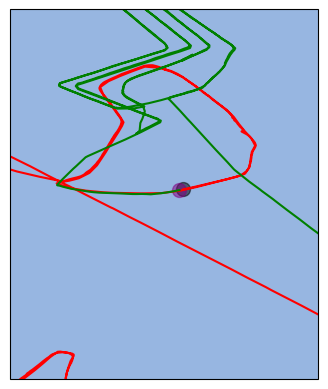

In [ ]:
fig, ax = plt.subplots(1, 1, subplot_kw={'projection': cartopy.crs.PlateCarree()})

df = df_jan[df_jan.shipid == segments_id.loc['2019-01', 'segment_id']].dropna()
df.sort_values('date_time_utc', inplace=True)
ax.scatter(df.iloc[[-1]]['longitude'], df.iloc[[-1]]['latitude'], c='black', s=100, alpha=0.5)
ax.plot(df['longitude'], df['latitude'], c='red')

df.last

df = df_feb[df_feb.shipid == segments_id.loc['2019-02', 'segment_id']].dropna()
df.sort_values('date_time_utc', inplace=True)
ax.scatter(df.iloc[[0]]['longitude'], df.iloc[[0]]['latitude'], c='purple', s=100, alpha=0.5)
ax.plot(df['longitude'], df['latitude'], c='green')

ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.LAND)

ax.set_xlim(-24.7, -24.2)
ax.set_ylim(64.7, 65.3)

fig.show()

In [35]:
import plotly.express as px

In [36]:
df = pd.concat([
    df_jan[df_jan.shipid == segments_id.loc['2019-01', 'segment_id']].dropna().sort_values('date_time_utc'),
    df_feb[df_feb.shipid == segments_id.loc['2019-02', 'segment_id']].dropna().sort_values('date_time_utc'),
])

df['shipid'] = df['shipid'].astype(str)

fig = px.scatter_mapbox(
    df, lat='latitude', lon='longitude', hover_name='date_time_utc',
    height=600, mapbox_style='open-street-map', color='shipid',
)

fig.show()

In [68]:
df_feb_01 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-01.csv", sep=',')
df_feb_02 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-02.csv", sep=',')
df_feb_03 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-03.csv", sep=',')
df_feb_04 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-04.csv", sep=',')
df_feb_05 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-05.csv", sep=',')
df_feb_06 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-06.csv", sep=',')
df_feb_07 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-07.csv", sep=',')
df_feb_08 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-08.csv", sep=',')
df_feb_09 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-09.csv", sep=',')
df_feb_10 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-10.csv", sep=',')
df_feb_11 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-11.csv", sep=',')
df_feb_12 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-12.csv", sep=',')
df_feb_13 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-13.csv", sep=',')
df_feb_14 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-14.csv", sep=',')
df_feb_15 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-15.csv", sep=',')
df_feb_16 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-16.csv", sep=',')
df_feb_17 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-17.csv", sep=',')
df_feb_18 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-18.csv", sep=',')
df_feb_19 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-19.csv", sep=',')
df_feb_20 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-20.csv", sep=',')
df_feb_21 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-21.csv", sep=',')
df_feb_22 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-22.csv", sep=',')
df_feb_23 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-23.csv", sep=',')
df_feb_24 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-24.csv", sep=',')
df_feb_25 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-25.csv", sep=',')
df_feb_26 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-26.csv", sep=',')
df_feb_27 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-27.csv", sep=',')
df_feb_28 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-02-28.csv", sep=',')


In [38]:
df_jan_01 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-01.csv", sep=',')
df_jan_02 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-02.csv", sep=',')
df_jan_03 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-03.csv", sep=',')
df_jan_04 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-04.csv", sep=',')
df_jan_05 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-05.csv", sep=',')
df_jan_06 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-06.csv", sep=',')
df_jan_07 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-07.csv", sep=',')
df_jan_08 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-08.csv", sep=',')
df_jan_09 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-09.csv", sep=',')
df_jan_10 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-10.csv", sep=',')
df_jan_11 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-11.csv", sep=',')
df_jan_12 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-12.csv", sep=',')
df_jan_13 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-13.csv", sep=',')
df_jan_14 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-14.csv", sep=',')
df_jan_15 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-15.csv", sep=',')
df_jan_16 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-16.csv", sep=',')
df_jan_17 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-17.csv", sep=',')
df_jan_18 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-18.csv", sep=',')
df_jan_19 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-19.csv", sep=',')
df_jan_20 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-20.csv", sep=',')
df_jan_21 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-21.csv", sep=',')
df_jan_22 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-22.csv", sep=',')
df_jan_23 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-23.csv", sep=',')
df_jan_24 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-24.csv", sep=',')
df_jan_25 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-25.csv", sep=',')
df_jan_26 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-26.csv", sep=',')
df_jan_27 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-27.csv", sep=',')
df_jan_28 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-28.csv", sep=',')
df_jan_29 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-29.csv", sep=',')
df_jan_30 = pd.read_csv("/Users/willponczak/Desktop/QC2025/data/gfw/ais-apparent-fishing-effort/mmsi-daily-csvs-10-v3-2019/mmsi-daily-csvs-10-v3-2019-01-30.csv", sep=',')


In [69]:
df_feb_gfw = pd.concat([
    df_feb_01, df_feb_02, df_feb_03, df_feb_04, df_feb_05,
    df_feb_06, df_feb_07, df_feb_08, df_feb_09, df_feb_10,
    df_feb_11, df_feb_12, df_feb_13, df_feb_14, df_feb_15,
    df_feb_16, df_feb_17, df_feb_18, df_feb_19, df_feb_20,
    df_feb_21, df_feb_22, df_feb_23, df_feb_24, df_feb_25,
    df_feb_26, df_feb_27, df_feb_28
])

In [70]:
df_feb_gfw.date.max()

'2019-02-28'

In [40]:
df_jan_gfw = pd.concat([
    df_jan_01, df_jan_02, df_jan_03, df_jan_04, df_jan_05,
    df_jan_06, df_jan_07, df_jan_08, df_jan_09, df_jan_10,
    df_jan_11, df_jan_12, df_jan_13, df_jan_14, df_jan_15,
    df_jan_16, df_jan_17, df_jan_18, df_jan_19, df_jan_20,
    df_jan_21, df_jan_22, df_jan_23, df_jan_24, df_jan_25,
    df_jan_26, df_jan_27, df_jan_28, df_jan_29, df_jan_30
])

In [71]:
df_jan_feb_gfw = pd.concat([df_jan_gfw, df_feb_gfw])

df_jan_feb_gfw.date.max()

'2019-02-28'

In [72]:
mmsi_list = [251160110, 251164000, 251228000]

df_jan_feb_gfw_specific_mmsi = df_jan_feb_gfw[df_jan_feb_gfw['mmsi'].isin(mmsi_list)]

df_jan_feb_gfw_specific_mmsi_smooth = points_to_smooth_lines(df_jan_feb_gfw_specific_mmsi)


In [49]:
import plotly.graph_objects as go

In [76]:
# Create the map figure
fig = go.Figure()

# Add tracks from df (precise coordinates)
for ship_id in df['shipid'].unique():
    ship_data = df[df['shipid'] == ship_id].sort_values('date_time_utc')
    fig.add_trace(go.Scattermapbox(
        lat=ship_data['latitude'],
        lon=ship_data['longitude'],
        mode='lines',
        name=f'ASTD - {ship_id}',
        line=dict(width=2)
    ))

# Add tracks from df_jan_feb_gfw_specific_mmsi_smooth (grid cells)
for mmsi in df_jan_feb_gfw_specific_mmsi_smooth['mmsi'].unique():
    mmsi_data = df_jan_feb_gfw_specific_mmsi_smooth[df_jan_feb_gfw_specific_mmsi_smooth['mmsi'] == mmsi].sort_index()
    fig.add_trace(go.Scattermapbox(
        lat=mmsi_data['cell_ll_lat'],  # or whatever your lat column is
        lon=mmsi_data['cell_ll_lon'],  # or whatever your lon column is
        mode='lines',
        name=f'GFW - {mmsi}',
        line=dict(width=2)
    ))

# Update layout
fig.update_layout(
    mapbox_style="open-street-map",
    height=600,
    margin={"r":0,"t":0,"l":0,"b":0},
    legend=dict(
        x=1,           # Right side (1 = far right, 0 = far left)
        y=0.5,           # Bottom (0 = bottom, 1 = top)
        xanchor='right',  # Anchor the legend box to its right edge
        yanchor='bottom'  # Anchor the legend box to its bottom edge
    )
)

fig.show()

In [64]:
df_jan_feb_gfw_specific_mmsi[df_jan_feb_gfw_specific_mmsi['mmsi'] == 251228000].date.min()

'2019-01-01'